F:\AI_ML\Python projects\AI Assignments\Practise\EDA


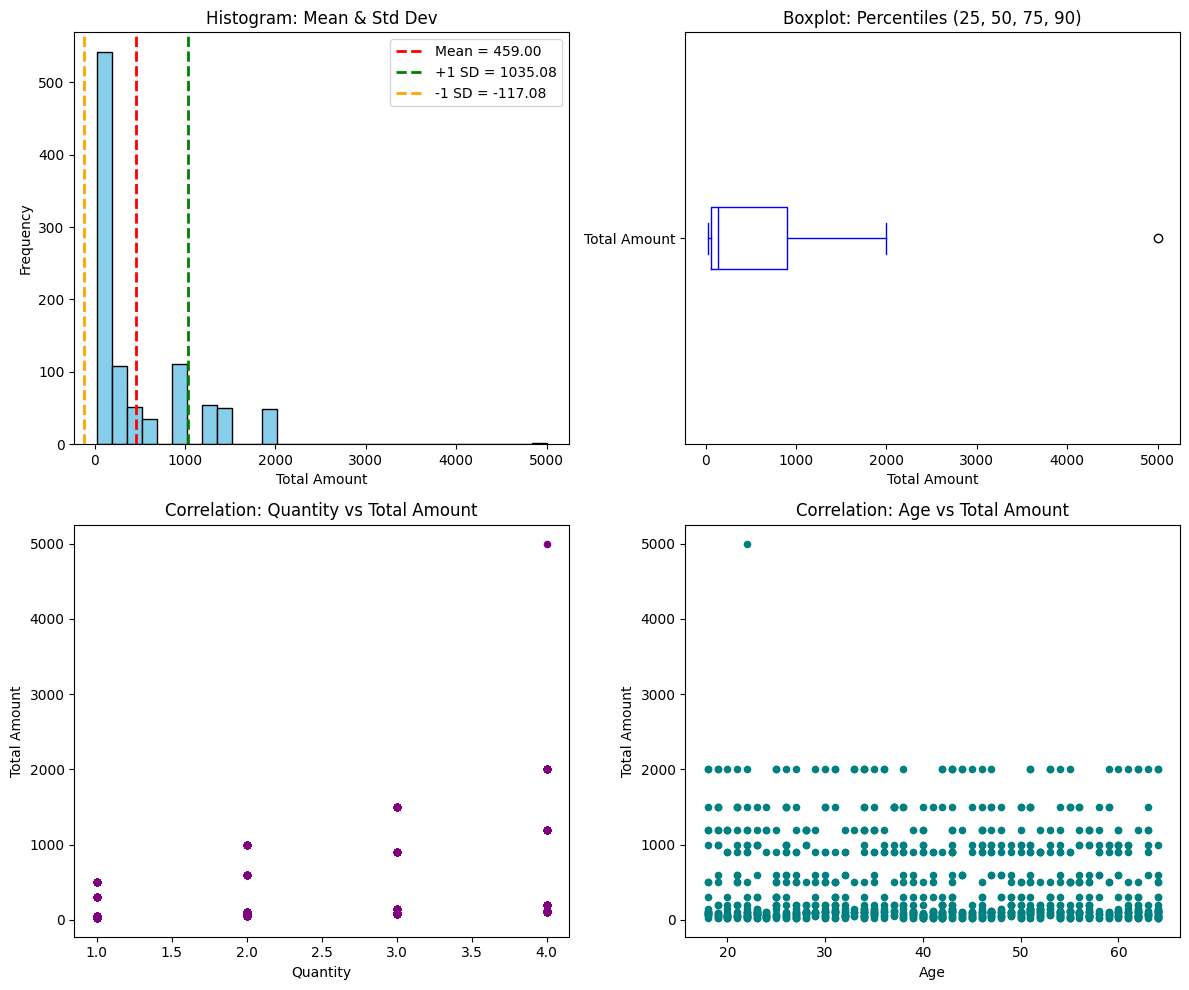

📌 Key Stats
Mean: 459.00
Variance: 331870.62
Standard Deviation: 576.08
Percentiles: {'25th': np.float64(60.0), '50th': np.float64(135.0), '75th': np.float64(900.0), '90th': np.float64(1200.0)}

Correlation Matrix:
               Quantity       Age  Total Amount
Quantity      1.000000 -0.023737      0.370111
Age          -0.023737  1.000000     -0.066266
Total Amount  0.370111 -0.066266      1.000000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print(os.getcwd())


# Load dataset
df = pd.read_csv("../docs/SalesDataset.csv")

# Focus on Total Amount
data = df["Total Amount"]

# --- Calculations ---
mean_val = data.mean()
variance_val = data.var()
std_val = data.std()
percentiles = {
    "25th": np.percentile(data, 25),
    "50th": np.percentile(data, 50),
    "75th": np.percentile(data, 75),
    "90th": np.percentile(data, 90)
}
correlations = df[["Quantity", "Age", "Total Amount"]].corr()

# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram with mean and std dev
axes[0,0].hist(data, bins=30, color='skyblue', edgecolor='black')
axes[0,0].axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f"Mean = {mean_val:.2f}")
axes[0,0].axvline(mean_val + std_val, color='green', linestyle='dashed', linewidth=2, label=f"+1 SD = {mean_val+std_val:.2f}")
axes[0,0].axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label=f"-1 SD = {mean_val-std_val:.2f}")
axes[0,0].set_title("Histogram: Mean & Std Dev")
axes[0,0].set_xlabel("Total Amount")
axes[0,0].set_ylabel("Frequency")
axes[0,0].legend()

# 2. Boxplot for percentiles
df["Total Amount"].plot(kind="box", vert=False, ax=axes[0,1], color="blue")
axes[0,1].set_title("Boxplot: Percentiles (25, 50, 75, 90)")
axes[0,1].set_xlabel("Total Amount")

# 3. Scatter: Quantity vs Total Amount (Correlation)
df.plot(kind="scatter", x="Quantity", y="Total Amount", ax=axes[1,0], color="purple")
axes[1,0].set_title("Correlation: Quantity vs Total Amount")

# 4. Scatter: Age vs Total Amount (Correlation)
df.plot(kind="scatter", x="Age", y="Total Amount", ax=axes[1,1], color="teal")
axes[1,1].set_title("Correlation: Age vs Total Amount")

plt.tight_layout()
plt.show()

# --- Print Summary ---
print("📌 Key Stats")
print(f"Mean: {mean_val:.2f}")
print(f"Variance: {variance_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")
print("Percentiles:", percentiles)
print("\nCorrelation Matrix:\n", correlations)
